In [2]:
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt
def _onehot(a,M):
    b = np.zeros( (a.size, M), dtype='int')
    b[ np.arange(a.size),a] = 1
    return b.T

In [3]:
df_all= pd.read_csv('All_data.csv')

In [4]:
df_all['Label']=df_all['2_way_label']
df_all['clean_title']=df_all['clean_title'].apply(lambda x: x.split())

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_all.clean_title, df_all.Label, test_size = 0.25, random_state = 42)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 0)

In [12]:
import ast
from gensim.models import Word2Vec
titles_corpus= []
for title in df_all["dic_words"][:]:
    new_list = list(ast.literal_eval(title).keys())
    if (new_list != []):
        titles_corpus.append(new_list)

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=titles_corpus, vector_size=100, window=5, min_count=1, workers=4, sg=1)
model.save("word2vec.model")

In [98]:
train_data= pd.DataFrame()
train_data['Word_list']= X_t
idx = X_t.index[0]
with open('train_word2vec.csv', 'w+') as word2vec_file:
    for index, row in train_data.iterrows():
        model_vector = (np.mean([model.wv[token] for token in row['Word_list']], axis=0)).tolist()
        if index == idx:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")

        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

[0.16377747058868408, 0.5647750496864319, -0.41527968645095825, -0.11676723510026932, 0.13857972621917725, -0.3116781413555145, -0.3385057747364044, 0.43415331840515137, -0.4088789224624634, -0.3996856212615967, -0.20836211740970612, -0.39092937111854553, -0.03864704817533493, 0.1385619342327118, 0.10820507258176804, -0.2131553292274475, -0.3251692056655884, -0.36633414030075073, -0.21149718761444092, 0.08362990617752075, -0.11325021833181381, 0.14917828142642975, 0.6386159658432007, 0.3253081440925598, 0.1623195856809616, -0.312885582447052, 0.037734195590019226, 0.2604628801345825, -0.04247182235121727, 0.07244925200939178, -0.18588440120220184, 0.2482188493013382, -0.17883893847465515, -0.07369343936443329, -0.16635508835315704, 0.047638796269893646, -0.05068597570061684, -0.39901313185691833, -0.02108852192759514, -0.33227282762527466, 0.2622203230857849, -0.32665762305259705, 0.08170212805271149, -0.02038295939564705, 0.2346808910369873, -0.3373073935508728, -0.362561970949173, 0.

In [100]:
print(len(model_vector))

100


In [16]:
w2f_df = pd.read_csv('train_word2vec.csv')
w2f_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.026493,0.273085,-0.105175,0.175692,0.204757,-0.144984,0.066037,0.453178,-0.128841,-0.222718,...,0.104533,0.163270,-0.118314,0.124291,-0.035473,0.135202,0.173883,-0.210744,0.046654,0.256264
1,0.024092,0.140935,-0.062945,0.003806,0.312014,-0.060696,0.095916,0.243580,-0.172785,-0.185306,...,0.618464,0.131715,0.296515,-0.024992,0.025590,0.054846,0.376982,0.041725,0.088840,-0.045345
2,-0.208747,0.211303,-0.036446,-0.009708,-0.344165,0.084931,0.065079,0.544420,-0.175978,0.071592,...,0.283547,-0.402061,0.003822,0.159023,0.383454,0.454002,0.144163,-0.295373,-0.343769,-0.029811
3,0.127795,0.200223,0.206196,0.047698,0.074942,-0.006958,0.211252,0.717210,0.153937,0.065161,...,0.379454,0.328201,0.216266,-0.132629,0.143391,0.482718,-0.023113,-0.116327,-0.191275,-0.181619
4,-0.054545,-0.126831,-0.056408,-0.187740,-0.180972,-0.518790,-0.005222,0.545287,-0.514759,-0.070856,...,-0.019798,-0.112812,0.342333,-0.527020,0.624489,0.507466,0.136599,0.059571,0.104774,-0.090414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340556,0.067089,0.111656,0.244485,-0.121622,-0.026950,-0.337015,0.167462,0.302599,-0.163911,-0.083493,...,0.150980,-0.062407,-0.065812,-0.074185,0.311019,0.230113,0.179053,-0.080357,0.006604,-0.165776
340557,-0.118440,-0.029005,-0.097191,-0.082335,-0.014213,-0.298692,-0.024797,0.027542,0.154666,0.022142,...,0.077871,0.013160,-0.072245,-0.064300,0.596340,0.479162,-0.104697,-0.192866,0.083632,0.128778
340558,0.008359,0.292776,-0.077243,0.026018,0.124446,-0.455630,0.035077,0.376063,-0.215522,-0.313887,...,0.441227,0.200245,-0.067028,-0.389513,0.351782,0.006825,0.130678,-0.041800,0.297767,-0.283298
340559,-0.080126,0.108359,-0.026144,-0.198178,-0.015043,-0.206091,0.149321,0.284106,-0.162157,0.047583,...,0.342904,0.063289,-0.104586,0.032897,0.555939,0.234286,0.196779,-0.200543,-0.073709,-0.203434


In [17]:
test_data= pd.DataFrame()
test_data['Word_list']= X_test
idx = X_test.index[0]
with open('test_word2vec.csv', 'w+') as word2vec_file:
    for index, row in test_data.iterrows():
        model_vector = (np.mean([model.wv[token] for token in row['Word_list']], axis=0)).tolist()
        if index == idx:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")

        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [18]:
w2f_test_df = pd.read_csv('test_word2vec.csv')
w2f_test_df.shape

(133554, 100)

In [19]:
test_data= pd.DataFrame()
test_data['Word_list']= X_val
idx = X_val.index[0]
with open('val_word2vec.csv', 'w+') as word2vec_file:
    for index, row in test_data.iterrows():
        model_vector = (np.mean([model.wv[token] for token in row['Word_list']], axis=0)).tolist()
        if index == idx:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")

        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [20]:
w2f_val_df = pd.read_csv('val_word2vec.csv')
w2f_val_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.067259,0.061630,-0.029880,-0.131169,-0.143528,-0.052643,0.175737,0.097219,-0.051603,-0.362285,...,0.319570,-0.002309,0.241056,0.002824,0.201430,0.286426,0.355454,-0.195918,-0.160301,-0.394020
1,-0.186749,0.222959,0.223848,-0.327336,-0.220277,-0.627499,0.038212,0.605497,-0.267189,-0.387551,...,0.211565,0.307197,-0.173068,-0.080777,0.761661,-0.229842,0.195148,-0.522059,-0.269665,0.071044
2,-0.085390,0.331885,0.102759,-0.177292,0.173854,0.043886,0.204166,0.013307,0.041163,0.012500,...,0.019850,0.209151,0.396242,-0.014598,-0.161618,0.241337,-0.154291,-0.132980,0.164133,-0.510176
3,-0.079577,0.123893,0.212828,-0.126244,-0.054118,-0.313136,0.156757,0.274160,-0.099461,-0.028277,...,-0.097735,0.102612,-0.152047,-0.267500,0.449232,0.288441,0.243956,-0.045505,0.163987,-0.170189
4,0.297763,0.524712,0.292426,0.094376,-0.346131,-0.280050,0.284786,0.464078,0.011330,-0.366159,...,0.189114,0.297404,-0.104970,-0.125647,-0.015946,0.085753,-0.414294,-0.257658,0.220791,-0.130250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60094,-0.309814,0.378096,-0.312121,0.099623,0.049205,-0.389214,0.120131,0.233321,-0.227019,-0.426761,...,0.539165,0.022750,-0.082081,-0.306407,0.394647,0.135770,0.568847,-0.160430,0.222288,-0.060794
60095,0.181023,0.125971,-0.139484,-0.241006,-0.307441,-0.482457,0.296401,0.073862,-0.151770,-0.144590,...,0.205218,0.107028,0.261340,-0.188674,0.225126,-0.236431,0.403017,-0.305010,-0.171789,0.060446
60096,0.382867,0.173068,0.006572,-0.371700,-0.130959,-0.290055,0.363032,0.301583,0.032835,-0.092692,...,0.056357,-0.185071,-0.055577,-0.058568,0.203204,0.372233,-0.052497,-0.112783,-0.016516,-0.344099
60097,0.138738,0.108645,-0.255388,-0.021816,0.053958,-0.458919,-0.213953,0.368486,0.147522,0.072289,...,0.311067,0.047907,0.190139,-0.106074,-0.137711,0.158046,-0.093010,-0.103864,-0.061820,-0.375735


In [21]:
y_tr=np.array(y_t)[np.newaxis].T
y_t=np.array(y_test)[np.newaxis].T
print(w2f_df.shape)
print(y_tr.shape)
print(w2f_test_df.shape)
print(y_t.shape)

(340561, 100)
(340561, 1)
(133554, 100)
(133554, 1)


In [22]:
X_train = w2f_df.values
X_test = w2f_test_df.values
y_train = y_tr
y_test = y_t

In [23]:
X_train.shape

(340561, 100)

In [24]:
classes = 2
train_size = y_train.shape[0]
y_train = y_train.reshape(1, train_size)
y_train = np.eye(classes)[y_train.astype('int32')-1]
y_train = y_train.T.reshape(classes, train_size)

test_size = y_test.shape[0]
y_test = y_test.reshape(1, test_size)
y_test = np.eye(classes)[y_test.astype('int32')-1]
y_test= y_test.T.reshape(classes, test_size)

In [25]:
y_train=y_train.T
y_test=y_test.T

In [26]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(340561, 2)
(133554, 2)
(340561, 100)
(133554, 100)


In [27]:
def standard_units(num):
    return (num - np.mean(num)/np.std(num))
Scaled = standard_units(X_train)

In [28]:
Scaled

array([[-0.00648817,  0.29308976, -0.08516996, ..., -0.19073929,
         0.06665943,  0.27626891],
       [ 0.04409733,  0.16094054, -0.04294035, ...,  0.06173003,
         0.10884484, -0.02534014],
       [-0.18874206,  0.23130817, -0.01644112, ..., -0.27536841,
        -0.32376443, -0.00980579],
       ...,
       [ 0.02836454,  0.31278078, -0.05723837, ..., -0.0217949 ,
         0.31777165, -0.26329299],
       [-0.06012071,  0.12836419, -0.00613924, ..., -0.18053836,
        -0.05370378, -0.18342927],
       [ 0.18378253,  0.58478011, -0.39527463, ...,  0.04529181,
         0.19769291, -0.48465728]])

In [30]:
X_trainn = X_train.copy()
X_train = Scaled

In [31]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [32]:
NH=int(input('Num of hidden layers'))
n_o=2 
n_i=X_train.shape[1] 

Num of hidden layers3


In [33]:
NN=[]
NN.append(n_i)
for i in range(NH):
    n=int(input('Num of nodes in  layers num %d: '%(i+1)))
    NN.append(n)
NN.append(n_o)

Num of nodes in  layers num 1: 50
Num of nodes in  layers num 2: 25
Num of nodes in  layers num 3: 4


In [54]:
w2f_val_df = np.array(w2f_val_df)

In [63]:
y_val = np.array(y_val)[np.newaxis].T
val_size = y_val.shape[1]
y_val = y_val.reshape(1, val_size)
y_val = np.eye(classes)[y_val.astype('int32')-1]
y_val= y_val.T.reshape(classes, val_size)

In [65]:
y_val = y_val.T

In [66]:
y_val.shape

(60099, 2)

In [34]:
def Sigmoid(Z):
    m=np.max(Z,axis=0).reshape(-1,1)
    Z=Z-m.T
#     print(Z.shape)
    
    A=np.exp(Z)/np.sum(np.exp(Z),axis=0,keepdims=True)
#     print(f'A{ A.shape}')
    return A 

def Relu(Z):
    return np.maximum(Z,-0.01*Z)
def initialize_layers(NN,NH):
    Wts={}
    for layer in range (1,len(NN)):
        Wts['W'+str(layer)]=np.random.randn(NN[layer],NN[layer-1])*np.sqrt(2 / NN[layer-1]) 
        Wts['b'+str(layer)]=np.zeros((NN[layer],1)) 
    return Wts
    
    

In [35]:
Wts=initialize_layers(NN,NH)
Wts['b1'].shape

(50, 1)

In [36]:
def Forward_Prob(Xt,Wts,NN):
    parameters=[]
    Ai=Xt 
   
    Ap=Ai 
    for i in range(1,len(NN)-1):
        W,b=Wts['W'+str(i)],Wts['b'+str(i)]
        Ap=Ai
        Z=np.dot(W,Ap.T)+b
        actv=Relu(Z)
        Ai=actv.T
        parameters.append((W,b,Ap,actv,Z))
    W,b=Wts['W'+str(len(NN)-1)],Wts['b'+str(len(NN)-1)]
    Ap=Ai
    Z=np.dot(W,Ap.T)+b
    actv=Sigmoid(Z) 
    Ai=actv.T
    
    parameters.append((W,b,Ap,actv,Z))
    Ao=Ai 
    return parameters, Ao 


In [37]:
def get_yp(Ao):
    y_p= np.array([(np.argmax(a)+1) for a in Ao]).reshape(-1,1)
    return y_p

In [38]:
def Loss(y_true,prediction):
    y_p=prediction
    m=y_true.shape[0]
    loss = -1/m*np.sum(np.multiply(y_true, np.log(y_p))+np.multiply(1-y_true, np.log(1-y_p)))
    return loss

In [39]:
def Back_Prob(y_true, Ao, parameters,Wts,NN):
    dZ =(Ao-y_true)
    derivatives={}
    m=y_true.shape[0]
    W,b,X,A,Z=parameters[len(NN)-2]
    
    dW=1.0/m*np.dot(dZ.T,X)
    db = (1/(m)) * np.sum(dZ, axis =0, keepdims = True).T
    derivatives['dW'+str(len(NN)-1)]=dW
    derivatives['db'+str(len(NN)-1)]=db
    for i in reversed(range(len(NN)-2)):
        Wp=W
        Xp=X
        #dA=dAp
        W,b,X,A,Z=parameters[i]
        dZp=dZ
        grad=np.ones((A.shape))
        grad[A<0]=-0.01
        dZ=np.dot(dZp,Wp)*grad.T 
        m=X.shape[0]
        dW=1.0/m*np.dot(dZ.T,X)
        db = (1/(m)) * np.sum(dZ, axis =0, keepdims = True).T
        derivatives['dW'+str(i+1)]=dW
        derivatives['db'+str(i+1)]=db
    return derivatives

In [91]:
def update(derivatives,Wts,parameters,learning_rate,NN):
    for i in range(1,len(NN)):
        Wts['b'+str(i)]=Wts['b'+str(i)]-learning_rate*derivatives['db'+str(i)]
        Wts['W'+str(i)]=Wts['W'+str(i)]-learning_rate*derivatives['dW'+str(i)]
    return Wts

In [92]:
# train the model
def Train_NN(iterations,X_train,y_train,NN,NH,learning_rate):
    Wts=initialize_layers(NN,NH)
    i=0
    loss=1
    losses=[]
    val_losses=[]
    while i< iterations:
        parameters,Ao=Forward_Prob(X_train,Wts,NN)
        loss=Loss(y_train,Ao)
        print("Training Loss: ",loss)
        derivatives=Back_Prob(y_train,Ao,parameters,Wts,NN)
        Wts=update(derivatives,Wts,parameters,learning_rate,NN)
        losses.append(loss)
        parm_val,Ao_val = Forward_Prob(w2f_val_df,Wts,NN)
        val_loss=Loss(y_val,Ao_val)
        val_losses.append(val_loss)
        print("VAL LOSS: ", val_loss)
        
        i+=1
    return (Wts,losses, val_losses)
    
        

In [93]:
def Predict(Wts,X_test):
    parameters,predict=Forward_Prob(X_test,Wts,NN)
    predict=np.array(predict)
    print(predict.shape)
    predictions=get_yp(predict)
    return predictions

In [94]:
def _main(X_train):
    it=200
    eta=0.25
    Wts,losses, val_losses=Train_NN(it,X_train,y_train,NN,NH,eta)
    y_p=Predict(Wts,X_test)
    yt=get_yp(y_test)
    from sklearn.metrics import classification_report,average_precision_score,accuracy_score,recall_score,precision_score
    ac=accuracy_score(yt,y_p)
    pr=precision_score(yt,y_p,average=None)
    rc=recall_score(yt,y_p,average=None)
    print(classification_report(yt,y_p))
    return (Wts,losses, val_losses)

In [95]:
Wts,losses, val_losses = _main(X_train)

Training Loss:  1.5985433493419876
VAL LOSS:  1.3862214615569755
Training Loss:  1.3844836176192457
VAL LOSS:  1.3821009755051494
Training Loss:  1.3801471099034464
VAL LOSS:  1.3788833298179681
Training Loss:  1.3766286167311186
VAL LOSS:  1.3761395653129938
Training Loss:  1.3735223633171116
VAL LOSS:  1.3734915534927756
Training Loss:  1.3705433014215322
VAL LOSS:  1.3707819585695062
Training Loss:  1.367475668074367
VAL LOSS:  1.3679376149369593
Training Loss:  1.3642317711998997
VAL LOSS:  1.3649205370326734
Training Loss:  1.3607822786968597
VAL LOSS:  1.3617050859665314
Training Loss:  1.3570607664933307
VAL LOSS:  1.3582724706402147
Training Loss:  1.353083461039165
VAL LOSS:  1.3546377656498834
Training Loss:  1.348909231829662
VAL LOSS:  1.3508734249105105
Training Loss:  1.344561428165697
VAL LOSS:  1.3469789375027224
Training Loss:  1.3400753532346412
VAL LOSS:  1.3430683661496825
Training Loss:  1.3354774995167826
VAL LOSS:  1.3391578622434337
Training Loss:  1.33094962268

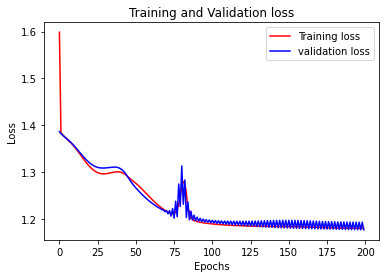

In [96]:
epochs = range(0,200)
plt.plot(epochs, losses, 'r', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
file = open("Weights.model", 'wb')
pickle.dump(Wts, file)
file.close()

In [111]:
if("woman" in model.wv):
    print(1)

1
